<div id = "top">
    <h3>STATISTICAL LEARNING - BASIC COMPUTER DATA</h3><br>
<li>Name: 18_Nguyen Van Thinh </li>
<li>SC: 43.01.104.168</li></div>

<div id="h_1">
    <h3>1.Data Introduction</h3><br>
    <li>Bộ dữ liệu này lấy từ <a herf='https://www.kaggle.com/kingburrito666/basic-computer-data-set?fbclid=IwAR3SO1LlqDwuV7esqV6FzxQ60Hg83mi68_OyD6ZG7oiMrs-dLO7FUNB9vAc'>Kaggle</a> nó là bộ dữ liệu cơ bản về các thông số của máy tính để dự đoán giá thành của nó.</li>
    <li>Bộ dữ liệu này gồm 6259 dòng và 10 cột.</li>
    <li>Với các features là: price, speed, hd, ram, screen, cd, multim, premium, ads, trend.</li>
    <li>Trong đó:</li>
    <ul>
        <li>Target là price.</li>
        <li>Bảy biến numberic là price, speed, hd, ram, screen, ads và trend. </li>
        <li>Ba biến categorical là cd, multi, và premium </li>
    </ul>
</div>

<div id="h_2">
    <h3>2. Data exploration </h3><br>
    
</div>

In [49]:
knitr::opts_chunk$set(message=FALSE,warning=FALSE)

ERROR: Error in loadNamespace(name): there is no package called 'knitr'


In [79]:
#load packages
library(ggplot2)
library(dplyr)
library(gridExtra)
library(corrplot)
library(corrgram)
library(caret)
library(psych)
library(cowplot)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




In [75]:
cp <- read.csv(file = 'Computers.csv', header=T) # Read file Computers.csv
head(cp,10) # First 10 rows of dataset

,X,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>
1,1,1499,25,80,4,14,no,no,yes,94,1
2,2,1795,33,85,2,14,no,no,yes,94,1
3,3,1595,25,170,4,15,no,no,yes,94,1
4,4,1849,25,170,8,14,no,no,no,94,1
5,5,3295,33,340,16,14,no,no,yes,94,1
6,6,3695,66,340,16,14,no,no,yes,94,1
7,7,1720,25,170,4,14,yes,no,yes,94,1
8,8,1995,50,85,2,14,no,no,yes,94,1
9,9,2225,50,210,8,14,no,no,yes,94,1


In [30]:
any(is.na(cp)) # check NaN

[1] FALSE

FAlSE là trong data có đầy đủ dữ liệu và không có các giá trị NaN

In [32]:
summary(cp) # Summarize the data of Basic computer dataset

     price          speed              hd              ram        
 Min.   : 949   Min.   : 25.00   Min.   :  80.0   Min.   : 2.000  
 1st Qu.:1794   1st Qu.: 33.00   1st Qu.: 214.0   1st Qu.: 4.000  
 Median :2144   Median : 50.00   Median : 340.0   Median : 8.000  
 Mean   :2220   Mean   : 52.01   Mean   : 416.6   Mean   : 8.287  
 3rd Qu.:2595   3rd Qu.: 66.00   3rd Qu.: 528.0   3rd Qu.: 8.000  
 Max.   :5399   Max.   :100.00   Max.   :2100.0   Max.   :32.000  
     screen        cd       multi      premium         ads       
 Min.   :14.00   no :3351   no :5386   no : 612   Min.   : 39.0  
 1st Qu.:14.00   yes:2908   yes: 873   yes:5647   1st Qu.:162.5  
 Median :14.00                                    Median :246.0  
 Mean   :14.61                                    Mean   :221.3  
 3rd Qu.:15.00                                    3rd Qu.:275.0  
 Max.   :17.00                                    Max.   :339.0  
     trend      
 Min.   : 1.00  
 1st Qu.:10.00  
 Median :16.00  
 

<pre>
Giải thích các biến:
    •	Min.    X: giá trị nhỏ nhất là X.     
    •	1st Qu. X: 25% nhỏ hơn X.
    •	Median  X: 50% nhỏ hơn X.     
    •	Mean    X: trung bình là X.  
    •	3rd Qu. X: 75% nhỏ hơn X.  
    •	Max.    X: giá trị lớn nhất là X.  
Trong đó các các categorical feature như: cd, multi, premium thì biểu thị tổng các giá trị 'yes', tổng các giá trị 'no'.
</pre>

In [36]:
cor(cp %>% select_if(is.numeric)) # Correlation of Basci Computer Dataset on numeric variables

,price,speed,hd,ram,screen,ads,trend
price,1.00000000,0.3009765,0.4302578,0.6227482,0.29604147,0.05454047,-0.1999869
speed,0.30097646,1.0000000,0.3723041,0.2347605,0.18907412,-0.21523206,0.4054383
hd,0.43025779,0.3723041,1.0000000,0.7777263,0.23280153,-0.32322200,0.5777901
ram,0.62274824,0.2347605,0.7777263,1.0000000,0.20895374,-0.18166971,0.2768438
screen,0.29604147,0.1890741,0.2328015,0.2089537,1.00000000,-0.09391943,0.1886144
ads,0.05454047,-0.2152321,-0.3232220,-0.1816697,-0.09391943,1.00000000,-0.3185525
trend,-0.19998694,0.4054383,0.5777901,0.2768438,0.18861444,-0.31855251,1.0000000


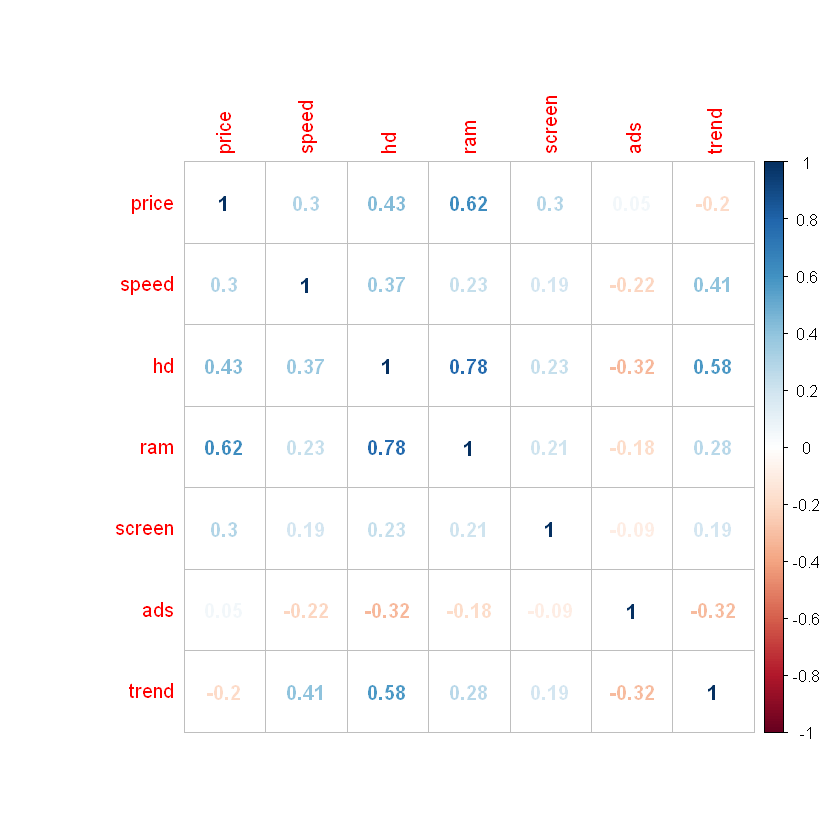

In [74]:
corrplot(cor(cp %>% select_if(is.numeric)) , method = "number")

<pre>
Chúng ta có thể nhận thấy mối tương quan giữa các feature:
    •	price vs ram
    •	price vs hd
    •	price vs speed
    •	price vs screen
</pre>

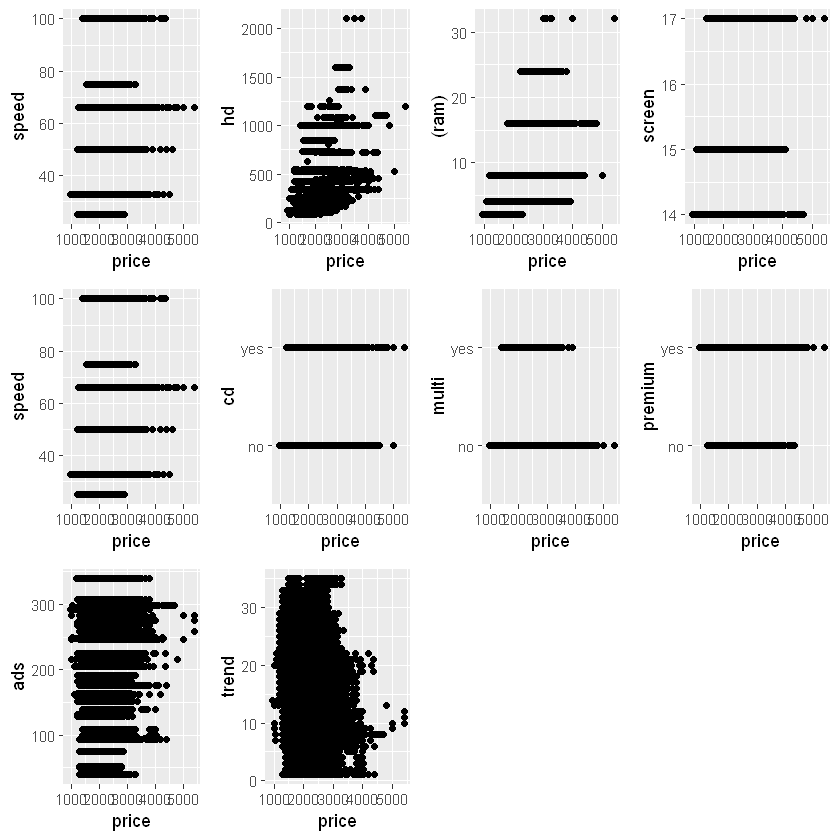

In [84]:
plot_speed <- ggplot(data = cp, aes(x = price, y = speed)) + geom_point()
plot_hd <- ggplot(data = cp, aes(x = price, y = hd)) + geom_point()
plot_ram <- ggplot(data = cp, aes(x = price, y = (ram))) + geom_point()
plot_screen <- ggplot(data = cp, aes(x = price, y = screen)) + geom_point()
plot_speed <- ggplot(data = cp, aes(x = price, y = speed)) + geom_point()
plot_cd <- ggplot(data = cp, aes(x = price, y = cd)) + geom_point()
plot_multi <- ggplot(data = cp, aes(x = price, y = multi)) + geom_point()
plot_premium <- ggplot(data = cp, aes(x = price, y = premium)) + geom_point()
plot_ads <- ggplot(data = cp, aes(x = price, y = ads)) + geom_point()
plot_trend <- ggplot(data = cp, aes(x = price, y = trend)) + geom_point()
plot_grid(plot_speed, plot_hd, plot_ram, plot_screen, plot_speed, plot_cd, plot_multi, plot_premium, plot_ads,plot_trend)

<pre>
Chúng ta có thể thầy là không có mối tương quan tuyến tính nào mạnh mẽ cả.
</pre>